# Heart Disease


##  Variable Information
Only 14 attributes used:

    1. Age (age): Patient's age in years.

    2. Sex (sex): Gender of the patient.
        Values: 1 = Male, 0 = Female

    3. Chest Pain Type (cp): Type of chest pain experienced.
        Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic

    4. Resting Blood Pressure (trestbps): Blood pressure on admission in mm Hg.

    5. Serum Cholesterol (chol): Serum cholesterol level in mg/dl.

    6. Fasting Blood Sugar (fbs): Fasting blood sugar level.
        Values: 1 = >120 mg/dl, 0 = <=120 mg/dl

    7. Resting Electrocardiographic Results (restecg): Results of resting electrocardiogram.
        Values: 0 = Normal, 1 = ST-T wave abnormality, 2 = Probable or definite left ventricular hypertrophy

    8. Maximum Heart Rate Achieved (thalach): Maximum heart rate during examination.

    9. Exercise-Induced Angina (exang): Presence of exercise-induced angina.
        Values: 1 = Yes, 0 = No

    10. ST Depression Induced by Exercise Relative to Rest (oldpeak): ST depression induced by exercise relative to rest.

    11. Slope of the Peak Exercise ST Segment (slope): Slope of the peak exercise ST segment.
        Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping

    12. Number of Major Vessels Colored by Fluoroscopy (ca): Number of major vessels colored by fluoroscopy. A higher count may indicate a greater degree of vessel involvement or narrowing, which can be associated with more advanced stages of coronary artery disease.

    13. Thalassemia (thal): Type of thalassemia.
        Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect

    14. Diagnosis of Heart Disease (num): Diagnosis based on angiographic disease status.
        Values: 0 = < 50% diameter narrowing, 1 = > 50% diameter narrowing (in any major vessel)

## Dataset info: 
https://archive.ics.uci.edu/dataset/45/heart+disease


## Introductory Paper

International application of a new probability algorithm for the diagnosis of coronary artery disease.
By R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. Guppy, S. Lee, V. Froelicher. 1989

Published in American Journal of Cardiology

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

In [120]:
! pip install ucimlrepo
! pip install pandas-profiling

In [25]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import CategoricalDtype

# Silence Seaborn FutureWarnings related to is_categorical_dtype
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore",
                        message="is_categorical_dtype is deprecated")
# import dataset
#heart_disease = fetch_ucirepo(name='Heart Disease')
heart_disease = fetch_ucirepo(id=45) 


# access data
df = heart_disease['data']['original']

In [26]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [27]:
# Define a dictionary with the new column names
new_column_names = {
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trestbps': 'RestingBloodPressure',
    'chol': 'SerumCholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestingECG',
    'thalach': 'MaxHeartRate',
    'exang': 'ExerciseInducedAngina',
    'oldpeak': 'STDepression',
    'slope': 'SlopeSTSegment',
    'ca': 'NumMajorVessels',
    'thal': 'Thalassemia',
    'num': 'HeartDiseaseDiagnosis'
}

# Rename the columns using the dictionary
df.rename(columns=new_column_names, inplace=True)

In [28]:
# First 5 rows of our data
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia,HeartDiseaseDiagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Sex                    303 non-null    int64  
 2   ChestPainType          303 non-null    int64  
 3   RestingBloodPressure   303 non-null    int64  
 4   SerumCholesterol       303 non-null    int64  
 5   FastingBloodSugar      303 non-null    int64  
 6   RestingECG             303 non-null    int64  
 7   MaxHeartRate           303 non-null    int64  
 8   ExerciseInducedAngina  303 non-null    int64  
 9   STDepression           303 non-null    float64
 10  SlopeSTSegment         303 non-null    int64  
 11  NumMajorVessels        299 non-null    float64
 12  Thalassemia            301 non-null    float64
 13  HeartDiseaseDiagnosis  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [30]:
# First 5 rows of our target
df['HeartDiseaseDiagnosis'].value_counts()

HeartDiseaseDiagnosis
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [31]:
df['HeartDiseaseDiagnosis'] = np.int64(df['HeartDiseaseDiagnosis'] < 1) # binarize the target

In [32]:
palette = ["#87CEEB", "#FFA07A"]

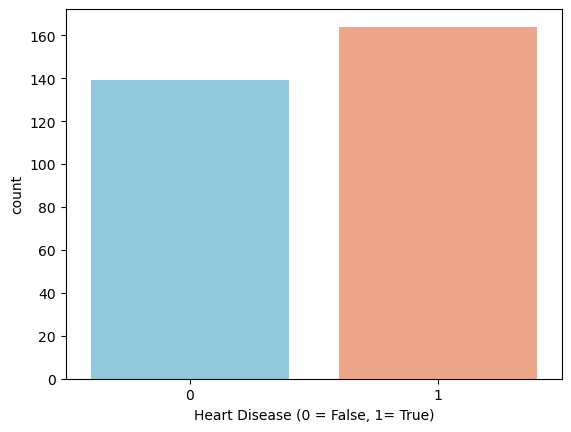

In [33]:
sns.countplot(x="HeartDiseaseDiagnosis", data=df, palette=palette)
plt.xlabel("Heart Disease (0 = False, 1= True)")
plt.show()

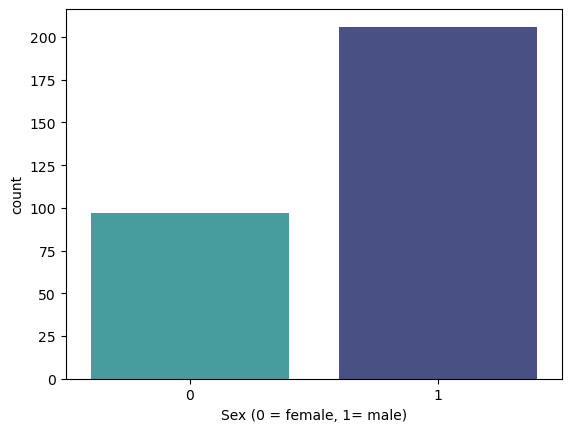

In [34]:
sns.countplot(x='Sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [35]:
df.groupby('HeartDiseaseDiagnosis').mean()

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseInducedAngina,STDepression,SlopeSTSegment,NumMajorVessels,Thalassemia
HeartDiseaseDiagnosis,,,,,,,,,,,,,
0,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681,5.840580
1,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546


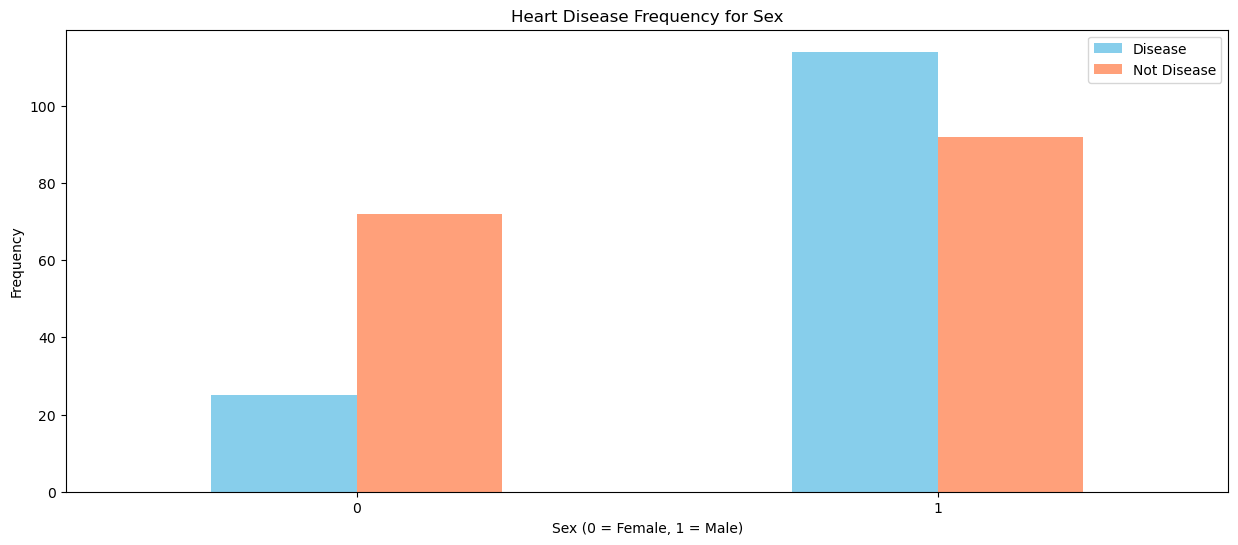

In [37]:
pd.crosstab(df.Sex,df.HeartDiseaseDiagnosis).plot(kind="bar",figsize=(15,6),color=palette)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Disease", "Not Disease"])
plt.ylabel('Frequency')
plt.show()

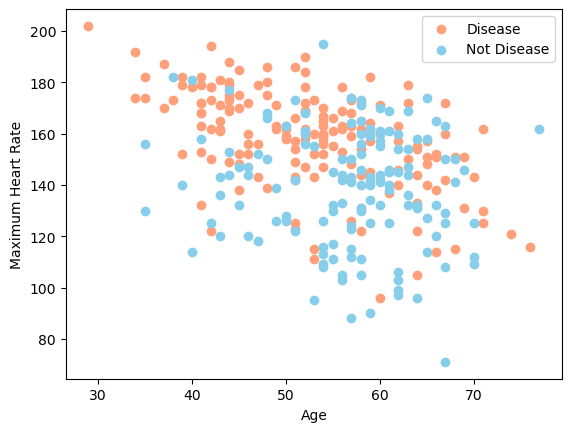

In [40]:
plt.scatter(x=df.Age[df.HeartDiseaseDiagnosis==1], y=df.MaxHeartRate[(df.HeartDiseaseDiagnosis==1)], c=palette[1])
plt.scatter(x=df.Age[df.HeartDiseaseDiagnosis==0], y=df.MaxHeartRate[(df.HeartDiseaseDiagnosis==0)], c=palette[0])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [41]:
# Define the mapping for each categorical variable
ChestPainType_mapping = {1: 'Typical angina', 2: 'Atypical angina', 3: 'Non-anginal pain', 4: 'Asymptomatic'}
Thalassemia_mapping = {3.0: 'Normal', 6.0: 'Fixed defect', 7.0: 'Reversible defect'}
SlopeSTSegment_mapping = {1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'}

# Replace the values in the original DataFrame
df['ChestPainType'] = df['ChestPainType'].map(ChestPainType_mapping)
df['Thalassemia'] = df['Thalassemia'].map(Thalassemia_mapping)
df['SlopeSTSegment'] = df['SlopeSTSegment'].map(SlopeSTSegment_mapping)

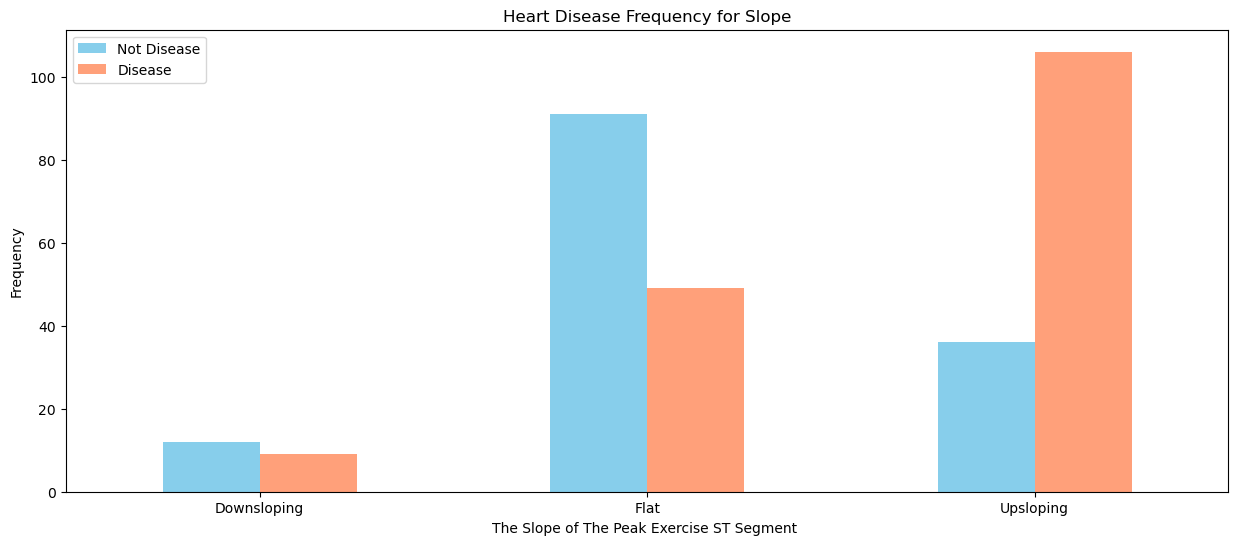

In [42]:
pd.crosstab(df.SlopeSTSegment,df.HeartDiseaseDiagnosis).plot(kind="bar",figsize=(15,6),color=palette)
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.legend(["Not Disease", "Disease"])
plt.ylabel('Frequency')
plt.show()

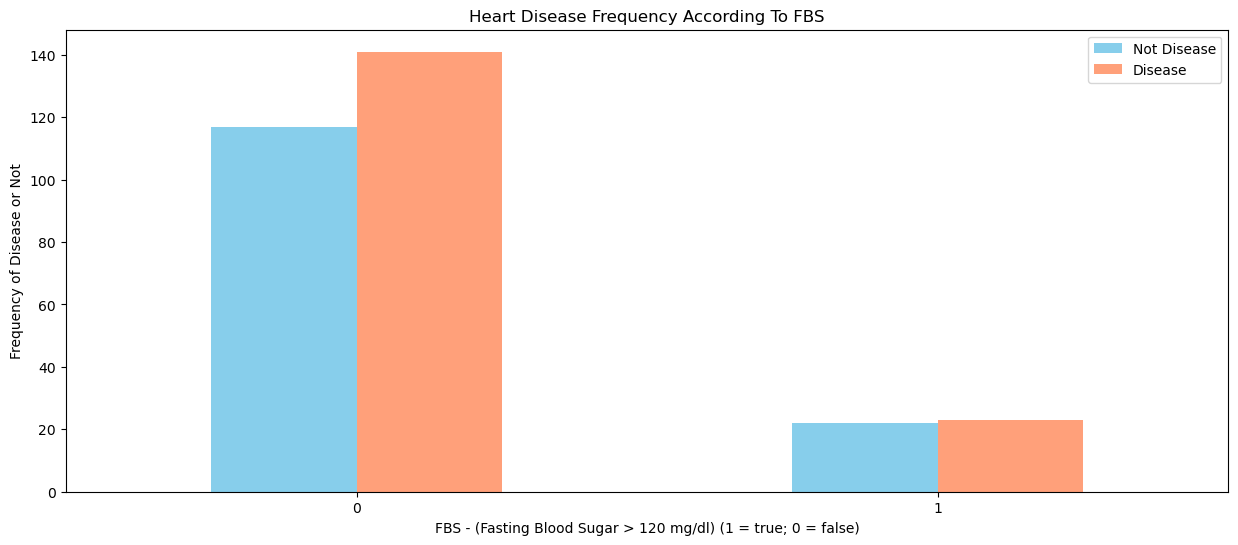

In [43]:
pd.crosstab(df.FastingBloodSugar,df.HeartDiseaseDiagnosis).plot(kind="bar",figsize=(15,6),color=palette)
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Not Disease", "Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

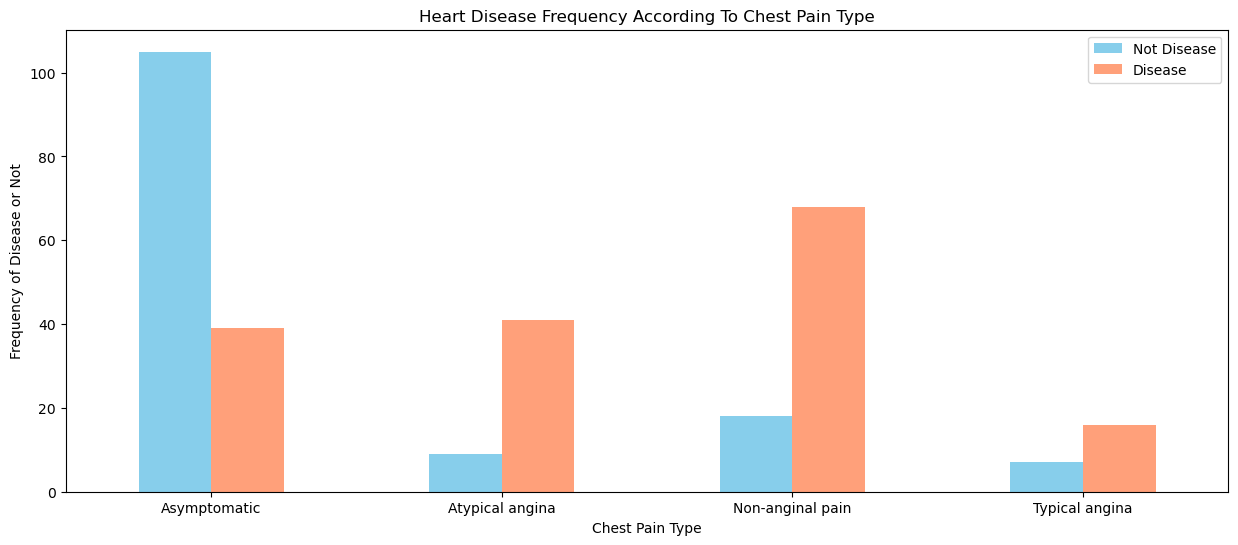

In [44]:
pd.crosstab(df.ChestPainType,df.HeartDiseaseDiagnosis).plot(kind="bar",figsize=(15,6),color=palette)
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.legend(["Not Disease", "Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

Creating Dummy Variables
Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

**Chest Pain Type (cp)**: Type of chest pain experienced.
        Values: 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic

**Thalassemia (thal)**: Type of thalassemia.
        Values: 3 = Normal, 6 = Fixed defect, 7 = Reversible defect

**Slope of the Peak Exercise ST Segment (slope)**: Slope of the peak exercise ST segment.
        Values: 1 = Upsloping, 2 = Flat, 3 = Downsloping


In [45]:
# Convert variables to appropriate data types
categorical_vars = ['ChestPainType', 'Thalassemia', 'SlopeSTSegment']
df[categorical_vars] = df[categorical_vars].astype(str)

In [46]:
df.replace('nan', np.nan, inplace=True)

In [47]:
# Use get_dummies and assign column names
dummies = pd.get_dummies(df[categorical_vars], prefix=categorical_vars,dummy_na = False, drop_first=True).astype(np.int64)
df = pd.concat([df, dummies], axis=1)
df = df.drop(columns=categorical_vars)

In [48]:
# Check for missing values in all columns
missing_values = df.isna().sum()

# Display the count of missing values in each column
print(missing_values)

Age                               0
Sex                               0
RestingBloodPressure              0
SerumCholesterol                  0
FastingBloodSugar                 0
RestingECG                        0
MaxHeartRate                      0
ExerciseInducedAngina             0
STDepression                      0
NumMajorVessels                   4
HeartDiseaseDiagnosis             0
ChestPainType_Atypical angina     0
ChestPainType_Non-anginal pain    0
ChestPainType_Typical angina      0
Thalassemia_Normal                0
Thalassemia_Reversible defect     0
SlopeSTSegment_Flat               0
SlopeSTSegment_Upsloping          0
dtype: int64


In [54]:
df.dropna(inplace=True)
# Display the count of missing values in each column
missing_values = df.isna().sum()
print(missing_values)

Age                               0
Sex                               0
RestingBloodPressure              0
SerumCholesterol                  0
FastingBloodSugar                 0
RestingECG                        0
MaxHeartRate                      0
ExerciseInducedAngina             0
STDepression                      0
NumMajorVessels                   0
HeartDiseaseDiagnosis             0
ChestPainType_Atypical angina     0
ChestPainType_Non-anginal pain    0
ChestPainType_Typical angina      0
Thalassemia_Normal                0
Thalassemia_Reversible defect     0
SlopeSTSegment_Flat               0
SlopeSTSegment_Upsloping          0
dtype: int64


## Model

In [56]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Separate features and target variable
X = df.drop('HeartDiseaseDiagnosis', axis=1)
y = df['HeartDiseaseDiagnosis']

# Perform a hold-out split (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Impute missing values using mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_train['NumMajorVessels'] = imputer.fit_transform(X_train[['NumMajorVessels']])
X_test['NumMajorVessels'] = imputer.transform(X_test[['NumMajorVessels']])

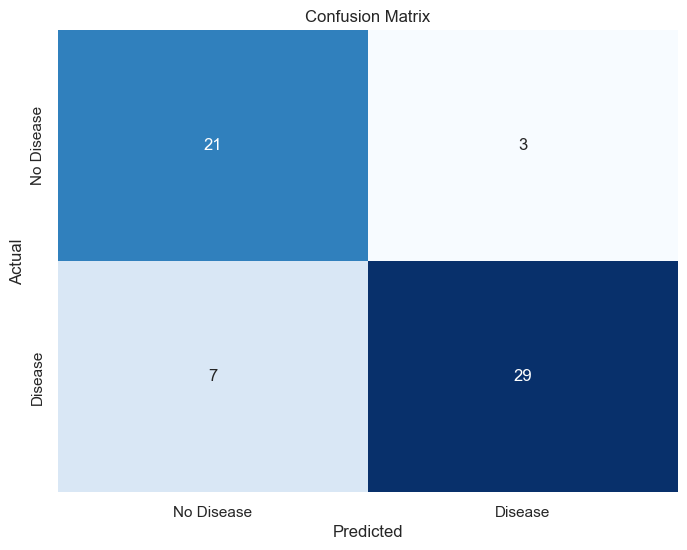


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1       0.91      0.81      0.85        36

    accuracy                           0.83        60
   macro avg       0.83      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60



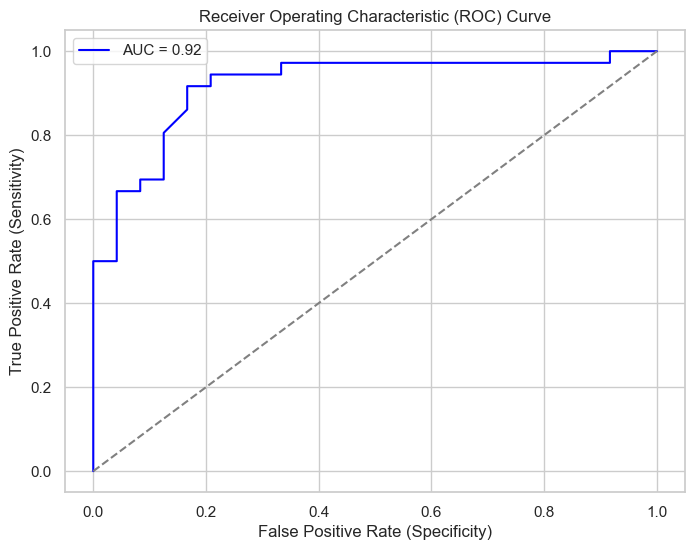

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Set hyperparameters (clinicians can modify these)
max_depth = 10
n_estimators = 100

# Create and train the Random Forest model
model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
trained_model = model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC (Area Under the Curve)
y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

In [67]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': trained_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                           Feature  Importance
9                  NumMajorVessels    0.133965
6                     MaxHeartRate    0.113979
8                     STDepression    0.104753
13              Thalassemia_Normal    0.090072
2             RestingBloodPressure    0.085828
3                 SerumCholesterol    0.085112
0                              Age    0.081189
7            ExerciseInducedAngina    0.056105
14   Thalassemia_Reversible defect    0.051884
16        SlopeSTSegment_Upsloping    0.039588
1                              Sex    0.037480
11  ChestPainType_Non-anginal pain    0.032422
15             SlopeSTSegment_Flat    0.032015
12    ChestPainType_Typical angina    0.020724
5                       RestingECG    0.015372
10   ChestPainType_Atypical angina    0.010562
4                FastingBloodSugar    0.008949


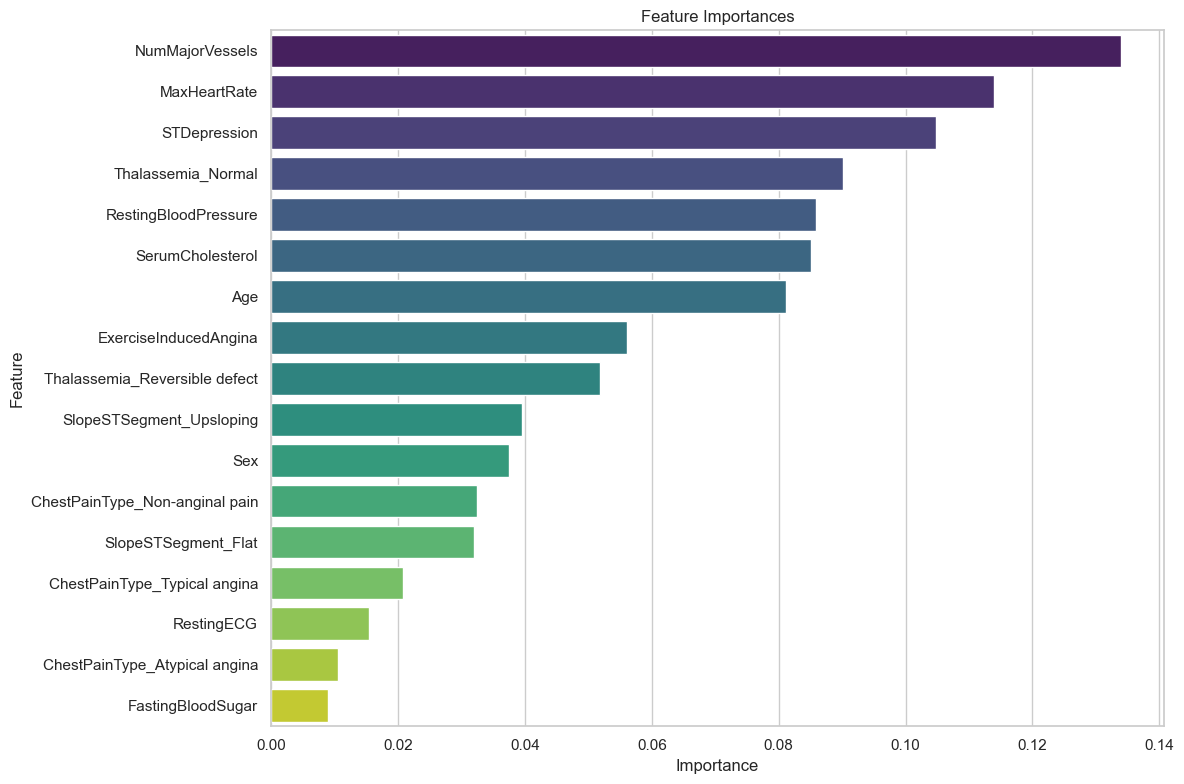

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Display feature importances with a bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [84]:
df['NumMajorVessels'].value_counts()

NumMajorVessels
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

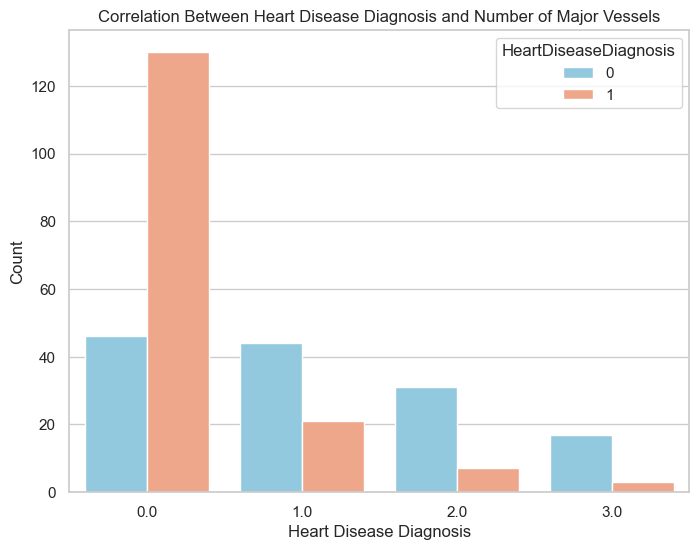

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame with 'HeartDiseaseDiagnosis' and 'NumMajorVessels'
# You may need to replace 'HeartDiseaseDiagnosis' and 'NumMajorVessels' with your actual column names

# Create a contingency table
contingency_table = pd.crosstab(df['HeartDiseaseDiagnosis'], df['NumMajorVessels'])

# Plot a stacked bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='NumMajorVessels', hue='HeartDiseaseDiagnosis', data=df, palette=palette)
plt.title('Correlation Between Heart Disease Diagnosis and Number of Major Vessels')
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Count')
plt.show()


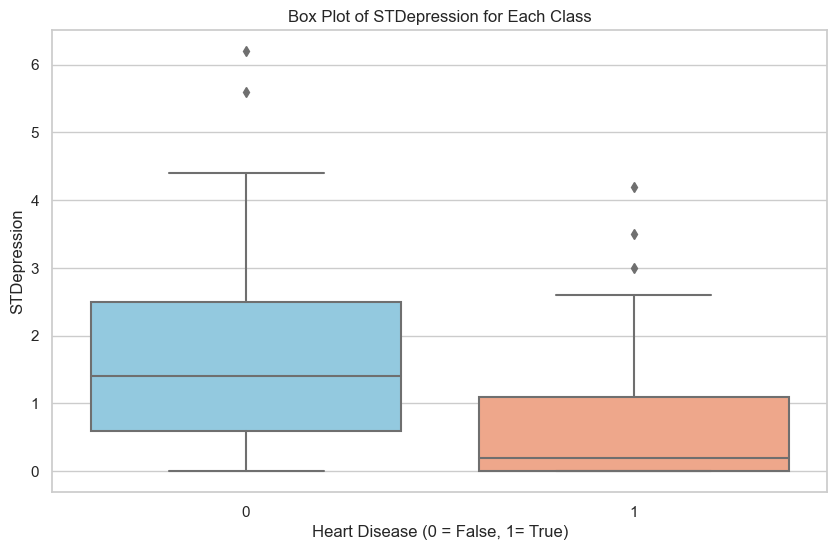

In [91]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDiseaseDiagnosis', y='STDepression', data=df, palette=palette)

# Add labels and title
plt.xlabel('Heart Disease (0 = False, 1= True)')
plt.ylabel('STDepression')
plt.title('Box Plot of STDepression for Each Class')

# Show the plot
plt.show()

## Explanation 

In [108]:
palette

['#87CEEB', '#FFA07A']

In [121]:
import shap

# load JS visualization code to notebook
shap.initjs()
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

patient_number = 2

# Force plot with custom colors
shap.force_plot(explainer.expected_value[1], shap_values[1][patient_number], X_test.iloc[patient_number, :], plot_cmap=palette[::-1])

In [139]:
patient_number = np.argmin(y_probs)

# Force plot with custom colors
shap.force_plot(explainer.expected_value[1], shap_values[1][patient_number], X_test.iloc[patient_number, :], plot_cmap=palette[::-1])

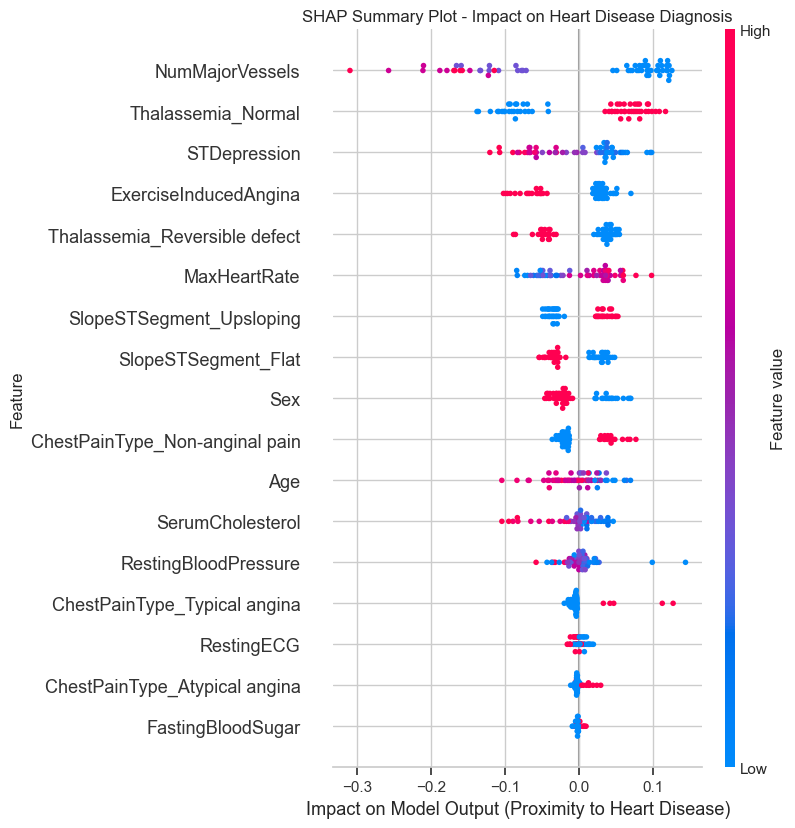

In [132]:
#Create a beeswarm plot to visualize the impact of features on predictions.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, show=False)
plt.title("SHAP Summary Plot - Impact on Heart Disease Diagnosis")
plt.xlabel("Impact on Model Output (Proximity to Heart Disease)")
plt.ylabel("Feature")
plt.show()
plt.show()

Sex (sex): Gender of the patient. Values: 1 = Male, 0 = Female

Exercise-Induced Angina (exang): Presence of exercise-induced angina.
    Values: 1 = Yes, 0 = No